In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
np.random.seed(42)

In [3]:
raw_data = pd.read_csv("Datasets/buli.csv")

In [4]:
raw_data.dropna(axis=0,how="all",inplace=True)
raw_data

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2019-08-16,20:30,Bayern Munich,2.7,2–2,0.9,Hertha BSC,75000.0,Allianz Arena,Harm Osmers,Match Report,NaN
1,1.0,Sat,2019-08-17,15:30,Freiburg,2.1,3–0,0.9,Mainz 05,24000.0,Schwarzwald-Stadion,Robert Hartmann,Match Report,NaN
2,1.0,Sat,2019-08-17,15:30,Leverkusen,2.7,3–2,1.2,Paderborn 07,26208.0,BayArena,Tobias Stieler,Match Report,NaN
3,1.0,Sat,2019-08-17,15:30,Wolfsburg,0.8,2–1,1.0,Köln,25099.0,Volkswagen Arena,Sven Jablonski,Match Report,NaN
4,1.0,Sat,2019-08-17,15:30,Werder Bremen,2.4,1–3,0.9,Düsseldorf,42100.0,Weserstadion,Felix Zwayer,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,30.0,Sat,2020-06-06,18:30,Dortmund,1.8,1–0,0.4,Hertha BSC,NaN,Signal Iduna Park,Harm Osmers,Match Report,NaN
298,30.0,Sun,2020-06-07,13:30,Werder Bremen,0.8,0–1,1.8,Wolfsburg,NaN,Weserstadion,Bibiana Steinhaus,Match Report,NaN
299,30.0,Sun,2020-06-07,15:30,Union Berlin,1.7,1–1,0.2,Schalke 04,NaN,Stadion An der Alten Försterei,Tobias Stieler,Match Report,NaN
300,30.0,Sun,2020-06-07,18:00,Augsburg,2.3,1–1,1.0,Köln,NaN,WWK Arena,Benjamin Cortus,Match Report,NaN


In [5]:
data_scores = raw_data[["Home","xG","Away","xG.1","Score"]]
data_scores

,Home,xG,Away,xG.1,Score
0,Bayern Munich,2.7,Hertha BSC,0.9,2–2
1,Freiburg,2.1,Mainz 05,0.9,3–0
2,Leverkusen,2.7,Paderborn 07,1.2,3–2
3,Wolfsburg,0.8,Köln,1.0,2–1
4,Werder Bremen,2.4,Düsseldorf,0.9,1–3
...,...,...,...,...,...
297,Dortmund,1.8,Hertha BSC,0.4,1–0
298,Werder Bremen,0.8,Wolfsburg,1.8,0–1
299,Union Berlin,1.7,Schalke 04,0.2,1–1
300,Augsburg,2.3,Köln,1.0,1–1


In [6]:
data_scores["Score"] = data_scores["Score"].apply(lambda x: x.split("–"))

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
data_scores

,Home,xG,Away,xG.1,Score
0,Bayern Munich,2.7,Hertha BSC,0.9,"[2, 2]"
1,Freiburg,2.1,Mainz 05,0.9,"[3, 0]"
2,Leverkusen,2.7,Paderborn 07,1.2,"[3, 2]"
3,Wolfsburg,0.8,Köln,1.0,"[2, 1]"
4,Werder Bremen,2.4,Düsseldorf,0.9,"[1, 3]"
...,...,...,...,...,...
297,Dortmund,1.8,Hertha BSC,0.4,"[1, 0]"
298,Werder Bremen,0.8,Wolfsburg,1.8,"[0, 1]"
299,Union Berlin,1.7,Schalke 04,0.2,"[1, 1]"
300,Augsburg,2.3,Köln,1.0,"[1, 1]"


This is a function that returns 0 if a draw, 1 if the home-team wins, and 2 if away-team wins

In [8]:
def check_class(x):
    home_score = x[0]
    away_score = x[1]
    return 1 if home_score > away_score else 0 if home_score == away_score else 2

In [9]:
data_scores["Score"] = data_scores["Score"].apply(lambda x: check_class(x))

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
t_dict = {}

for idx,team in enumerate(data_scores["Home"][:18]):
    t_dict[team] = idx

In [11]:
t_dict

{'Bayern Munich': 0,
 'Freiburg': 1,
 'Leverkusen': 2,
 'Wolfsburg': 3,
 'Werder Bremen': 4,
 'Dortmund': 5,
 "M'gladbach": 6,
 'Eint Frankfurt': 7,
 'Union Berlin': 8,
 'Köln': 9,
 'Paderborn 07': 10,
 'Augsburg': 11,
 'Düsseldorf': 12,
 'Hoffenheim': 13,
 'Mainz 05': 14,
 'Schalke 04': 15,
 'RB Leipzig': 16,
 'Hertha BSC': 17}

In [12]:
data_scores["Home"] = data_scores["Home"].apply(lambda x: t_dict[x])

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data_scores["Away"] = data_scores["Away"].apply(lambda x: t_dict[x])

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
data_scores

,Home,xG,Away,xG.1,Score
0,0,2.7,17,0.9,0
1,1,2.1,14,0.9,1
2,2,2.7,10,1.2,1
3,3,0.8,9,1.0,1
4,4,2.4,12,0.9,2
...,...,...,...,...,...
297,5,1.8,17,0.4,1
298,4,0.8,3,1.8,2
299,8,1.7,15,0.2,0
300,11,2.3,9,1.0,0


In [15]:
from sklearn.model_selection import train_test_split as tts

In [16]:
X = data_scores[["Home","Away","xG","xG.1"]]
y = data_scores["Score"]

In [17]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rand_for = RandomForestClassifier()

Lets use some param search to get the best hyperparameters. Because earlier the model was overfitting badly maybe we can regularize it a little

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
param = [
    {"n_estimators":[100,105,110,120,130], "max_depth":[5,10,12,15,20],"max_leaf_nodes":[2,3,6,10,50],
     "min_samples_leaf":[1,5,10,20], "min_samples_split":[8,10,12]}
]
grid_search = RandomizedSearchCV(rand_for,cv=5,param_distributions=param,
                                 scoring="neg_mean_squared_error", return_train_score=True)

In [22]:
best_attr = grid_search.fit(X_train,y_train)

In [23]:
best_attr.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 20,
 'max_leaf_nodes': 10,
 'max_depth': 15}

In [24]:
best_attr.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

It looks like the algorithm never predicts a draw which is odd

In [25]:
train_pred = best_attr.predict(X_train)
train_pred

array([2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 1, 1, 1, 2], dtype=int64)

In [26]:
np.array(y_train)

array([2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 1,
       2, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1,
       2, 2, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2,
       0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       0, 1, 1, 1, 2], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(np.array(y_train),train_pred)

0.6685082872928176

In [29]:
test_pred = best_attr.predict(X_test)

After having tweaked many different hyperparameters it looks like the algorithm cant get a prediction higher than 57.7 I assume that thats because it just predict the matchups the same when they play twice against each other

In [30]:
accuracy_score(np.array(y_test),test_pred)

0.5555555555555556

##### Lets try another algorithm

In [31]:
from sklearn.svm import LinearSVC

In [32]:
svm = LinearSVC(loss="hinge")

In [33]:
svm.fit(X_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [35]:
svm_train_pred = svm.predict(X_train)

In [36]:
svm_train_pred

array([2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2], dtype=int64)

In [37]:
accuracy_score(y_train,svm_train_pred)

0.5911602209944752

In [38]:
svm_test_pred = svm.predict(X_test)

In [39]:
accuracy_score(y_test,svm_test_pred)

0.6111111111111112

##### Lets test this svm model on the current fixtures from today https://fbref.com/en/comps/20/schedule/Bundesliga-Fixtures

In [43]:
_31_spieltag = pd.read_csv("Datasets/_31_spieltag.csv")

In [44]:
_31_spieltag

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,31,Fri,2020-06-12,20:30,Hoffenheim,2.0,0–2,1.8,RB Leipzig,NaN,PreZero Arena,Tobias Welz,Match Report,NaN
1,31,Sat,2020-06-13,15:30,Düsseldorf,0.5,0–1,0.6,Dortmund,NaN,Merkur Spielarena,Sascha Stegemann,Match Report,NaN
2,31,Sat,2020-06-13,15:30,Paderborn 07,1.7,1–5,2.7,Werder Bremen,NaN,Benteler-Arena,Christian Dingert,Match Report,NaN
3,31,Sat,2020-06-13,15:30,Hertha BSC,1.0,1–4,2.4,Eint Frankfurt,NaN,Olympiastadion Berlin,Robert Hartmann,Match Report,NaN
4,31,Sat,2020-06-13,15:30,Wolfsburg,2.8,2–2,2.3,Freiburg,NaN,Volkswagen Arena,Bastian Dankert,Match Report,NaN
5,31,Sat,2020-06-13,15:30,Köln,1.3,1–2,1.2,Union Berlin,NaN,RheinEnergieSTADION,Martin Petersen,Match Report,NaN
6,31,Sat,2020-06-13,18:30,Bayern Munich,1.5,2–1,0.8,M'gladbach,NaN,Allianz Arena,Felix Zwayer,Match Report,NaN


In [45]:
_31_spieltag = _31_spieltag[["Home","xG","Away","xG.1","Score"]]

_31_spieltag["Score"] = _31_spieltag["Score"].apply(lambda x: x.split("–"))

_31_spieltag["Score"] = _31_spieltag["Score"].apply(lambda x: check_class(x))

_31_spieltag["Home"] = _31_spieltag["Home"].apply(lambda x: t_dict[x])
_31_spieltag["Away"] = _31_spieltag["Away"].apply(lambda x: t_dict[x])

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tr

In [46]:
_31_spieltag

,Home,xG,Away,xG.1,Score
0,13,2.0,16,1.8,2
1,12,0.5,5,0.6,2
2,10,1.7,4,2.7,2
3,17,1.0,7,2.4,2
4,3,2.8,1,2.3,0
5,9,1.3,8,1.2,2
6,0,1.5,6,0.8,1


In [47]:
X_31 = _31_spieltag[["Home","xG","Away","xG.1"]]
y_31 = _31_spieltag["Score"]

In [48]:
X_31

,Home,xG,Away,xG.1
0,13,2.0,16,1.8
1,12,0.5,5,0.6
2,10,1.7,4,2.7
3,17,1.0,7,2.4
4,3,2.8,1,2.3
5,9,1.3,8,1.2
6,0,1.5,6,0.8


In [49]:
_31_pred = svm.predict(X_31)
_31_pred

array([1, 1, 1, 1, 2, 1, 1], dtype=int64)

In [52]:
accuracy_score(np.array(y_31),_31_pred)

0.14285714285714285

This accuracy is herendous so I wondered why the models didnt work properly. I decided to plot the data. And we can see that its unseperable in 2d.

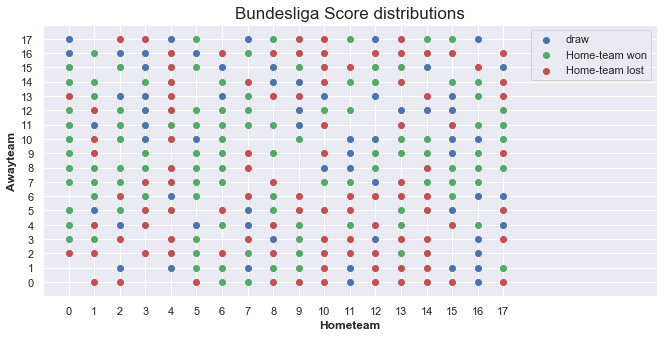

In [103]:
plt.figure(figsize=(11, 5))

plt.scatter(x=data_scores.iloc[:,0][data_scores["Score"]==0],y=data_scores.iloc[:,2][data_scores["Score"]==0],color="b",
           label="draw")
plt.scatter(x=data_scores.iloc[:,0][data_scores["Score"]==1],y=data_scores.iloc[:,2][data_scores["Score"]==1],color="g",
           label="Home-team won") 
plt.scatter(x=data_scores.iloc[:,0][data_scores["Score"]==2],y=data_scores.iloc[:,2][data_scores["Score"]==2],color="r",
           label="Home-team lost")
plt.axis([-1,23,-1,18])
plt.xticks(np.arange(0,18))
plt.xlabel("Hometeam",fontweight="bold")
plt.yticks(np.arange(0,18))
plt.ylabel("Awayteam",fontweight="bold")
plt.title("Bundesliga Score distributions",fontsize=17)
plt.legend()

I still have to figure out how to manipulate my data better in order to enhance the model performance. Or maybe the classical ML algorthims are all prone to underfitting because they are too simple. But lets first think that its not that